In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Face Mask Dataset/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 10000 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Face Mask Dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 992 images belonging to 2 classes.


In [52]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience = 25)

In [55]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [56]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 200,callbacks=[early_stop])

Epoch 1/200
313/313 [==============================] - 38s 119ms/step - loss: 0.1899 - accuracy: 0.9333 - val_loss: 0.0701 - val_accuracy: 0.9758
Epoch 2/200
313/313 [==============================] - 28s 89ms/step - loss: 0.0564 - accuracy: 0.9792 - val_loss: 0.0528 - val_accuracy: 0.9778
Epoch 3/200
313/313 [==============================] - 27s 87ms/step - loss: 0.0432 - accuracy: 0.9848 - val_loss: 0.0707 - val_accuracy: 0.9778
Epoch 4/200
313/313 [==============================] - 27s 87ms/step - loss: 0.0420 - accuracy: 0.9850 - val_loss: 0.0438 - val_accuracy: 0.9819
Epoch 5/200
313/313 [==============================] - 27s 87ms/step - loss: 0.0356 - accuracy: 0.9872 - val_loss: 0.0636 - val_accuracy: 0.9758
Epoch 6/200
313/313 [==============================] - 28s 88ms/step - loss: 0.0309 - accuracy: 0.9892 - val_loss: 0.0346 - val_accuracy: 0.9879
Epoch 7/200
313/313 [==============================] - 31s 97ms/step - loss: 0.0302 - accuracy: 0.9892 - val_loss: 0.0561 - val_a

313/313 [==============================] - 30s 96ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0413 - val_accuracy: 0.9940
Epoch 58/200
313/313 [==============================] - 30s 97ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0558 - val_accuracy: 0.9919
Epoch 59/200
313/313 [==============================] - 30s 97ms/step - loss: 0.0024 - accuracy: 0.9990 - val_loss: 0.0187 - val_accuracy: 0.9960
Epoch 60/200
313/313 [==============================] - 30s 96ms/step - loss: 0.0039 - accuracy: 0.9985 - val_loss: 0.0530 - val_accuracy: 0.9889
Epoch 61/200
313/313 [==============================] - 30s 97ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.0236 - val_accuracy: 0.9970
Epoch 62/200
313/313 [==============================] - 31s 98ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.1011 - val_accuracy: 0.9768
Epoch 63/200
313/313 [==============================] - 30s 96ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.0258 - val_accuracy

In [58]:
import pandas as pd
performance_df = pd.DataFrame(cnn.history.history)

<AxesSubplot:>

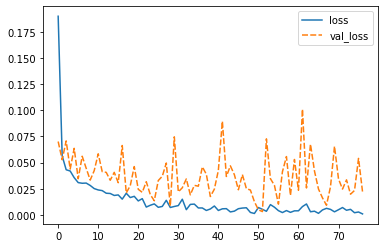

In [61]:
import seaborn as sns
sns.lineplot(data=performance_df[['loss','val_loss']])

In [62]:
cnn.save('cnnmodel.h5')